In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

plt.rc('font', family='NanumBarunGothic')

# Embedding (feat. TSNE)

In [2]:
# 1. 실습 데이터 준비
sentences = [
    # Group: Food & Fruit
    "I love eating fresh red apples.",
    "Bananas are a great source of potassium.",
    "This Italian restaurant serves delicious pasta.",
    
    # Group: Technology & IT
    "The new smartphone has a powerful processor.",
    "Artificial Intelligence is changing the world.",
    "Python is a popular programming language.",
    
    # Group: Nature & Weather
    "The weather is very sunny and warm today.",
    "It is expected to rain heavily tomorrow.",
    "The blue ocean waves look very calm."
]

In [3]:
# 그룹 라벨 
labels = ['Fruit']*3 + ['Tech']*3 + ['Weather']*3

In [4]:
# 2. 임베딩 모델 
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

In [5]:
# 3. 텍스트를 벡터로 변환 (Embedding)
embeddings = model.encode(sentences)
print(f"변환된 벡터의 차원: {embeddings.shape}") 

변환된 벡터의 차원: (9, 384)


In [6]:
# 4. 차원 축소 
# 384차원의 벡터는 눈으로 볼 수 없으므로, 특징을 유지하며 2차원으로 압축
tsne = TSNE(n_components=2, perplexity=2, random_state=42, init='pca', learning_rate='auto')
vis_dims = tsne.fit_transform(embeddings)

In [7]:
# 5. 시각화 결과 데이터프레임 생성
df = pd.DataFrame({
    'x': vis_dims[:, 0],
    'y': vis_dims[:, 1],
    'label': labels,
    'text': sentences
})

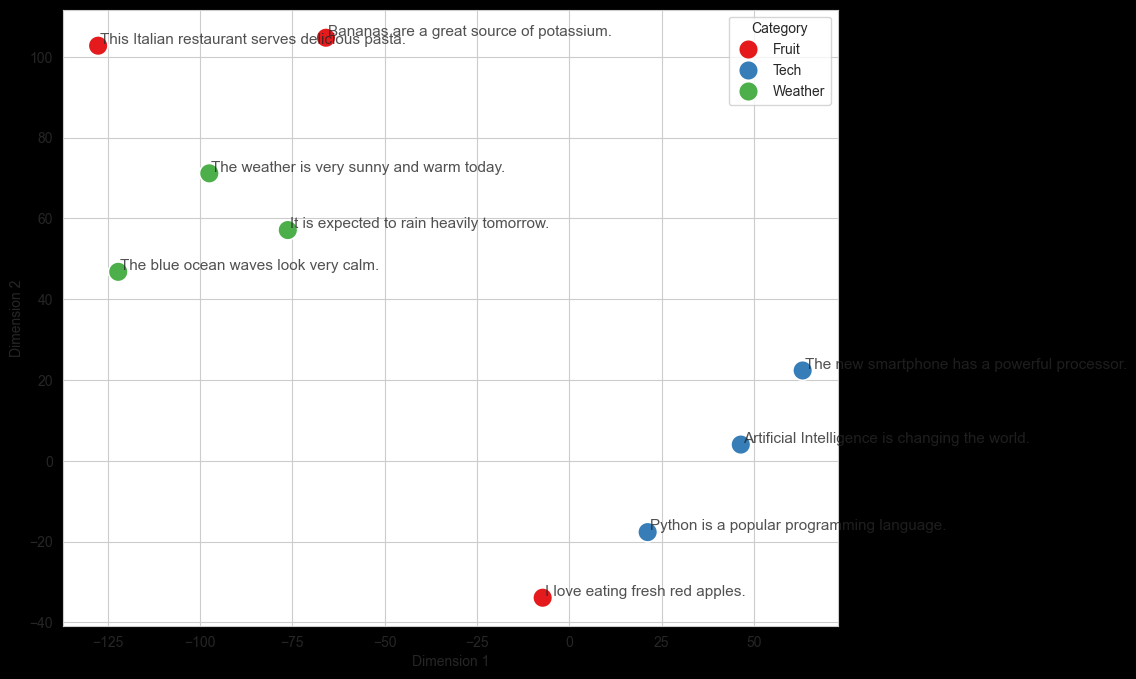

In [8]:
# 6. 결과 그래프 그리기
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")

scatter = sns.scatterplot(data=df, x='x', y='y', hue='label', s=200, palette='Set1')

for i in range(len(df)):
    plt.text(df.x[i] + 0.5, df.y[i] + 0.5, df.text[i], fontsize=11, alpha=0.8)

plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(title='Category')
plt.show()

# Advanced

In [9]:
# 파일 경로 
file_path = 'sample_sentences.txt'

In [10]:
# 임베딩 모델 
model = SentenceTransformer('all-MiniLM-L6-v2')

총 50개의 문장을 성공적으로 불러왔습니다.
벡터 변환 중...


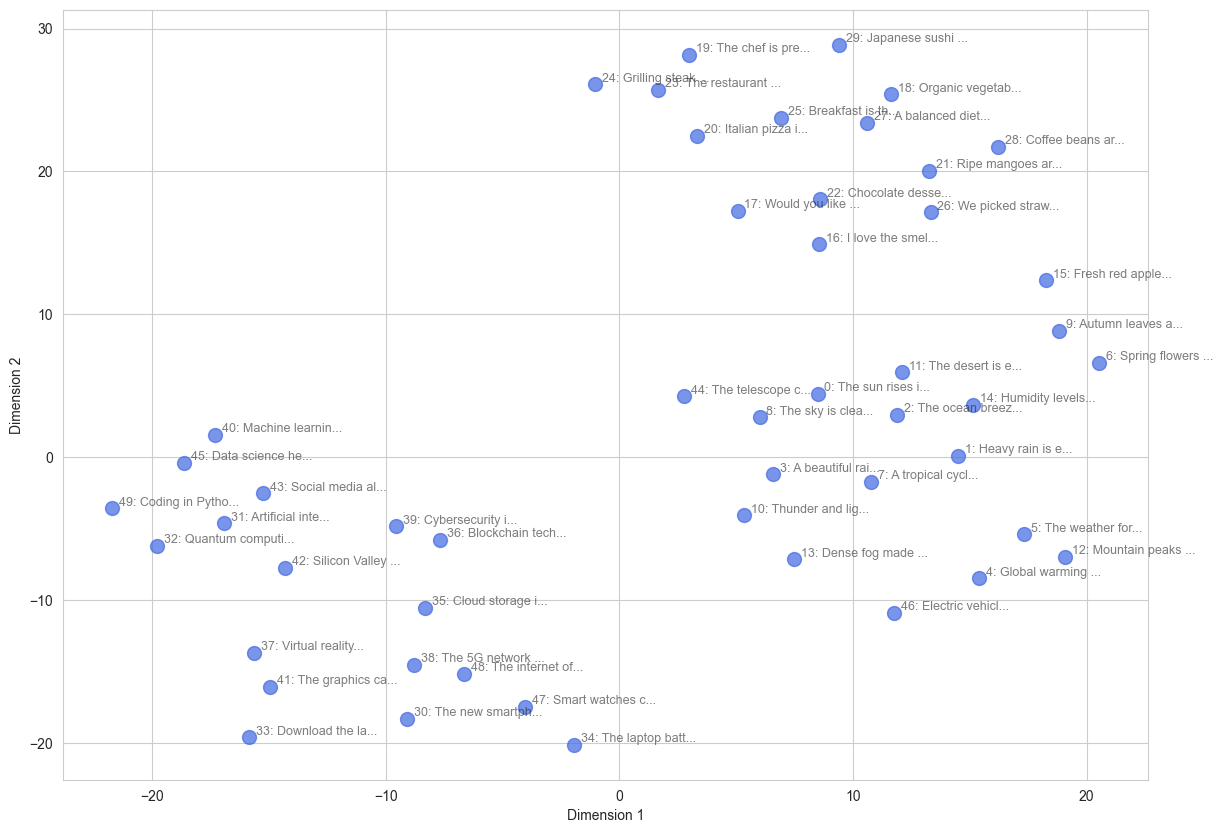

In [11]:
try:
    # 1. 파일 읽기
    with open(file_path, 'r', encoding='utf-8') as f:
        sentences = [line.strip() for line in f.readlines() if line.strip()]
    print(f"총 {len(sentences)}개의 문장을 성공적으로 불러왔습니다.")

except FileNotFoundError:
    print("에러: 파일을 찾을 수 없습니다.")
    sentences = []


if sentences:
    # 2. 임베딩 모델 로드
    # model = SentenceTransformer('all-MiniLM-L6-v2')

    # 3. 텍스트를 벡터로 변환
    print("벡터 변환 중...")
    embeddings = model.encode(sentences)

    # 4. 차원 축소 (t-SNE)
    # 데이터가 50개 이상이므로 perplexity를 약간 높여서 군집의 밀도 조정
    tsne = TSNE(n_components=2, perplexity=10, random_state=42, init='pca', learning_rate='auto')
    vis_dims = tsne.fit_transform(embeddings)

    # 5. 결과 시각화
    plt.figure(figsize=(14, 10))
    sns.set_style("whitegrid")

    # (이번에는 라벨을 수동으로 달지 않고, t-SNE가 스스로 어떻게 묶는지 확인)
    plt.scatter(vis_dims[:, 0], vis_dims[:, 1], alpha=0.7, c='royalblue', s=100)

    # 가독성을 위해 정보 일부(10자)만 표시
    for i, txt in enumerate(sentences):
        plt.annotate(f"{i}: {txt[:15]}...", (vis_dims[i, 0], vis_dims[i, 1]), 
                     fontsize=9, alpha=0.6, xytext=(5, 2), textcoords='offset points')

    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()

---
End of Documents